In [94]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
conn = sql.connect('database (1).sqlite')
conn

In [15]:
a = conn.execute('select * from Salaries')
a

In [17]:
pd.read_sql_query('select * from sqlite_master',conn)

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...
1,index,salaries_year_idx,Salaries,16566,CREATE INDEX salaries_year_idx ON Salaries (Year)


In [19]:
pd.read_sql_query('select * from Salaries',conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [21]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

1. What is the average TotalPayBenefits for each JobTitle? exclude ('Not Provided', 'Not provided')

In [27]:
q= '''select  avg(TotalPaybenefits) as "Avg TotalPay Per Title" , JobTitle from Salaries
  where JobTitle != "Not provided"  and JobTitle != "Not Provided"
  group by JobTitle order by 1 desc
  
'''

sql_query(q)

,Avg TotalPay Per Title,JobTitle
0,436224.360000,Chief Investment Officer
1,411732.266667,Chief of Police
2,408865.326667,"Chief, Fire Department"
3,399211.275000,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
4,380696.440000,"Gen Mgr, Public Trnsp Dept"
...,...,...
2153,673.800000,SPECIAL ASSISTANT XIV
2154,638.787879,"BOARD/COMMISSION MEMBER, GROUP III"
2155,475.047742,"BdComm Mbr, Grp2,M=$25/Mtg"
2156,296.511628,"BOARD/COMMISSION MEMBER, GROUP II"


2. Which JobTitle has the most employees in each year? exclude ('Not Provided', 'Not provided')

In [35]:

q= '''select  count(EmployeeName) as "Employee Count" ,JobTitle ,Year from Salaries
  where JobTitle != "Not provided"  and JobTitle != "Not Provided"  
  group by JobTitle order by 1 desc

'''

sql_query(q)

,Employee Count,JobTitle,Year
0,7036,Transit Operator,2012
1,4389,Special Nurse,2012
2,3736,Registered Nurse,2012
3,2518,Public Svc Aide-Public Works,2012
4,2421,Police Officer 3,2012
...,...,...,...
2153,1,"AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS",2011
2154,1,"AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS AD...",2011
2155,1,"ADMINISTRATOR, SFGH MEDICAL CENTER",2011
2156,1,ACUPUNCTURIST,2011


3. What is the total number of unique employees? exclude ('Not Provided', 'Not provided')

In [37]:

q= '''select  count(distinct EmployeeName) as "Unique Employees" from Salaries
  where JobTitle not in ('Not Provided', 'Not provided')


'''

sql_query(q)

,Unique Employees
0,110810


4. Show All Employees Ordered By Their TotalPayBenefits In Descending Order? exclude ('Not Provided', 'Not provided')

In [43]:
q= '''select EmployeeName, TotalPaybenefits  from Salaries
  where JobTitle not in ('Not Provided', 'Not provided')
  group by EmployeeName order by 2 desc
  
'''

sql_query(q)

,EmployeeName,TotalPayBenefits
0,NATHANIEL FORD,567595.43
1,GARY JIMENEZ,538909.28
2,William J Coaker Jr.,436224.36
3,Gregory P Suhr,425815.28
4,Joanne M Hayes-White,422353.40
...,...,...
110805,Charlene D Mccully,0.00
110806,Timothy E Gibson,-2.73
110807,Mark E Laherty,-8.20
110808,David P Kucia,-33.89


5. Show All Employees With A TotalPaybenefits Value Between 125,000 and 150,000 And A Job Title 'Firefighter'? exclude ('Not Provided', 'Not provided')

In [47]:
q = '''select EmployeeName , TotalPayBenefits, JobTitle from Salaries
    where TotalPayBenefits >125000 and TotalPayBenefits <150000 and jobtitle = 'Firefighter'
'''

sql_query(q)

,EmployeeName,TotalPayBenefits,JobTitle
0,Randall Henderson,147912.75,Firefighter
1,Virginia Cheung,147862.14,Firefighter
2,Travis Hemenez,147664.12,Firefighter
3,Gail Readdie,147452.17,Firefighter
4,Gregory Ginotti,147216.47,Firefighter
...,...,...,...
110,Stephen J Kloster,126784.13,Firefighter
111,Jeffrey D Ryan,126687.13,Firefighter
112,Jovan R Blake,126169.62,Firefighter
113,Dino M Cafferata,125680.52,Firefighter


6. How many employees have no overtime pay or other pay? exclude ('Not Provided', 'Not provided')


In [53]:
q = '''select count(distinct EmployeeName) as "Empolyees having no Overtime and Other Pay" , OvertimePay, OtherPay from Salaries
    where EmployeeName not in ('Not Provided', 'Not provided') and OvertimePay <= 0 and OtherPay <= 0
'''

sql_query(q)

,Empolyees having no Overtime and Other Pay,OvertimePay,OtherPay
0,29223,0,0


7. Show top 10 employees having (overtimepay+OtherPay) in bar plot?  exclude ('Not Provided', 'Not provided')

In [84]:
q = '''select EmployeeName, OvertimePay,OtherPay,(OvertimePay+OtherPay) as "ExtraPay" from Salaries 
   where EmployeeName not in ('Not Provided', 'Not provided')
   order by 3 desc limit 10
'''
sql_query(q)

,EmployeeName,OvertimePay,OtherPay,ExtraPay
0,NATHANIEL FORD,0.00,400184.25,400184.25
1,David Shinn,0.00,342802.63,342802.63
2,John Goldberg,0.00,245999.41,245999.41
3,James Harrigan,0.00,206752.00,206752.00
4,Stephen Tacchini,0.00,204290.09,204290.09
5,John Ehrlich,1386.38,203735.92,205122.30
6,Croce Casciato,0.00,203471.13,203471.13
7,Michael J Morris,0.00,202322.37,202322.37
8,Leda Rozier,0.00,200951.30,200951.30
9,Gregory Corrales,0.00,199112.35,199112.35


<Axes: xlabel='EmployeeName'>

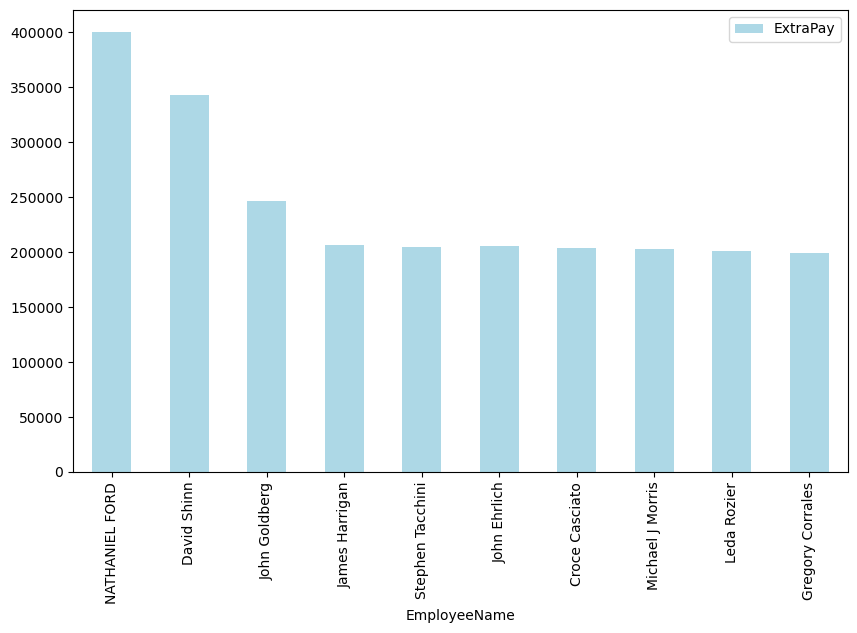

In [86]:
a = pd.read_sql_query(q,conn)
a.plot(kind='bar', x='EmployeeName', y='ExtraPay', color='lightblue', figsize=(10,6))

8. Show The Average of BasePay, OverTime, OtherPay for all employees in pie chart? exclude ('Not Provided', 'Not provided')


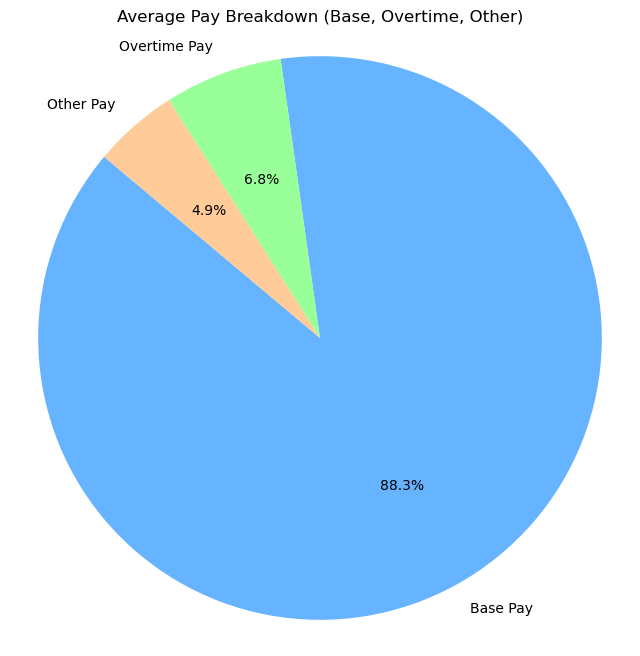

In [96]:
q = '''
SELECT 
    AVG(BasePay) AS AvgBasePay,
    AVG(OvertimePay) AS AvgOvertimePay,
    AVG(OtherPay) AS AvgOtherPay
FROM Salaries
WHERE EmployeeName NOT IN ('Not Provided', 'Not provided');
'''

# Read query result
a = pd.read_sql_query(q, conn)

# Prepare data for pie chart
avg_values = a.iloc[0]
labels = ['Base Pay', 'Overtime Pay', 'Other Pay']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(avg_values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Average Pay Breakdown (Base, Overtime, Other)')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.show()

9. Get the average TotalPayBenefits for each JobTitle, but only for those with an average pay greater than 75000? exclude ('Not Provided', 'Not provided')


In [56]:
q= '''select  avg(TotalPayBenefits) as "Avg Total Pay Benefits", JobTitle ,avg(TotalPay) AvgTotalPay from Salaries
    where JobTitle not in ('Not Provided', 'Not provided')
  group by 2
  having AvgTotalPay > 75000
  order by 3

'''

sql_query(q)

,Avg Total Pay Benefits,JobTitle,AvgTotalPay
0,104191.161429,HSA Emp & Training Spec II,75018.698000
1,100488.932730,Nursing Assistant,75057.988393
2,104159.982381,Prpl Permit and Citation Clerk,75086.208095
3,104724.598000,Wharfinger 2,75105.602000
4,101554.094348,Biologist,75149.434783
...,...,...,...
1153,307899.460000,DEPUTY DIRECTOR OF INVESTMENTS,307899.460000
1154,408865.326667,"Chief, Fire Department",325971.683333
1155,411732.266667,Chief of Police,329183.646667
1156,436224.360000,Chief Investment Officer,339653.700000


10. Get the number of employees (EmployeeName) for each JobTitle, where the count is greater than 10?  exclude ('Not Provided', 'Not provided')


In [62]:
q= '''select  count(EmployeeName)  as "Employee Count", JobTitle  from Salaries
  where  JobTitle not in ('Not Provided', 'Not provided')
  group by 2
  having "Employee Count" > 10


'''

sql_query(q)

,Employee Count,JobTitle
0,83,ACCOUNT CLERK
1,48,ACCOUNTANT INTERN
2,93,ADMINISTRATIVE ANALYST
3,27,AIRPORT COMMUNICATIONS OPERATOR
4,13,AIRPORT ECONOMIC PLANNER
...,...,...
1151,30,Wire Rope Cable Maint Mechanic
1152,14,Worker's Comp Supervisor 1
1153,74,Worker's Compensation Adjuster
1154,26,X-RAY LABORATORY AIDE
